In [12]:
import sys
sys.path.append('..')
from src.pomdp import *

In [13]:
model, solver = load_POMDP_file(file_name='./Example Models/4x3.95-no_loop_2.POMDP')

In [14]:
model.convert_to_grid([
    ['s0', 's1', 's2', 's3'],
    ['s4', None, 's5', 's6'],
    ['s7', 's8', 's9', 's10']
    ])

In [16]:
solver.eps = 10e-4

In [17]:
vf, history = solver.solve(model, 10,10)

Expansions:  70%|███████   | 7/10 [00:09<00:03,  1.33s/it]

Converged early...


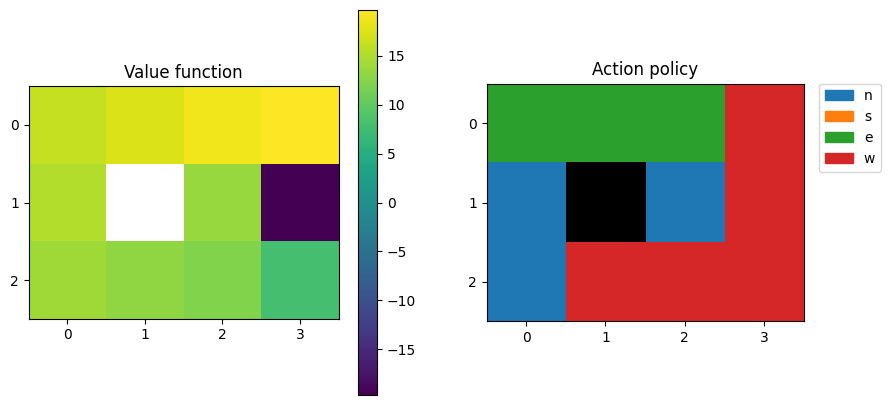

In [18]:
vf.plot()

In [11]:
model.expected_rewards_table

array([[-0.04 , -0.04 , -0.04 , -0.04 ],
       [-0.04 , -0.04 , -0.04 , -0.04 ],
       [ 0.064,  0.064,  0.792, -0.04 ],
       [ 0.896, -0.704,  0.8  , -0.032],
       [-0.04 , -0.04 , -0.04 , -0.04 ],
       [-0.136, -0.136, -0.808, -0.04 ],
       [ 0.696, -0.136, -0.704,  0.064],
       [-0.04 , -0.04 , -0.04 , -0.04 ],
       [-0.04 , -0.04 , -0.04 , -0.04 ],
       [-0.04 , -0.04 , -0.04 , -0.04 ],
       [-0.808, -0.04 , -0.136, -0.136]])

## Checking for better pruning

In [19]:
len(vf)

40

In [20]:
pruned_vf = vf.prune(level=4)

In [21]:
len(pruned_vf)

40

In [22]:
vf

[AlphaVector([ 14.00830653,  14.09909475,  14.62459271,  19.65230791,
               14.20485092,  12.81727214, -19.65230791,  13.16897647,
               12.40356986,  10.29428391,   7.90796289]),
 AlphaVector([ 13.26006265,  13.37893262,  14.36844246,  19.65230791,
               13.2887099 ,  10.31653351, -19.65230791,  13.16840604,
               11.6002621 ,  11.61761476, -14.00286814]),
 AlphaVector([ 15.19550332,  13.59398158,  14.36844246,  19.65230791,
               15.19772874,   7.84675465, -19.65230791,  13.40882167,
               11.0861692 ,  -8.14061613, -14.00286814]),
 AlphaVector([ 14.76258735,  15.57120087,  17.65424349,  19.65230791,
               14.6280592 ,  13.22257539, -19.65230791,  13.77984145,
               10.40970558,  10.11978586, -14.18617467]),
 AlphaVector([ 16.27247473,  17.49970396,  16.23640304,  19.65230791,
               13.77624193, -13.2061591 , -19.65230791,   7.75152957,
                7.34487103,   5.41080955,   4.75159022]),
 AlphaVect

## Agent simulation

In [23]:
sim = Simulation(model=model, done_on_state=[3,6])

In [24]:
a = Agent(model)

In [25]:
a.value_function = vf

In [31]:
rh = a.simulate(sim)

In [32]:
rh

[{'belief': Belief([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
          0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
          0.09090909]),
  'state': 10,
  'action': 3,
  'next_state': 9,
  'next_belief': Belief([0.    , 0.3125, 0.0625, 0.    , 0.    , 0.    , 0.    , 0.    ,
          0.3125, 0.3125, 0.    ]),
  'reward': -0.04,
  'observation': 2},
 {'belief': Belief([0.    , 0.3125, 0.0625, 0.    , 0.    , 0.    , 0.    , 0.    ,
          0.3125, 0.3125, 0.    ]),
  'state': 9,
  'action': 0,
  'next_state': 5,
  'next_belief': Belief([0.1, 0. , 0. , 0. , 0. , 0.8, 0. , 0.1, 0. , 0. , 0. ]),
  'reward': -0.04,
  'observation': 0},
 {'belief': Belief([0.1, 0. , 0. , 0. , 0. , 0.8, 0. , 0.1, 0. , 0. , 0. ]),
  'state': 5,
  'action': 0,
  'next_state': 2,
  'next_belief': Belief([0.        , 0.01515152, 0.96969697, 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.01515152, 0.        ,
          0.        ]),
  'reward': -0.04,

In [33]:
for step in rh:
    print(f"{step['state']} - {step['action']}")

10 - 3
9 - 0
5 - 0
2 - 2
2 - 2


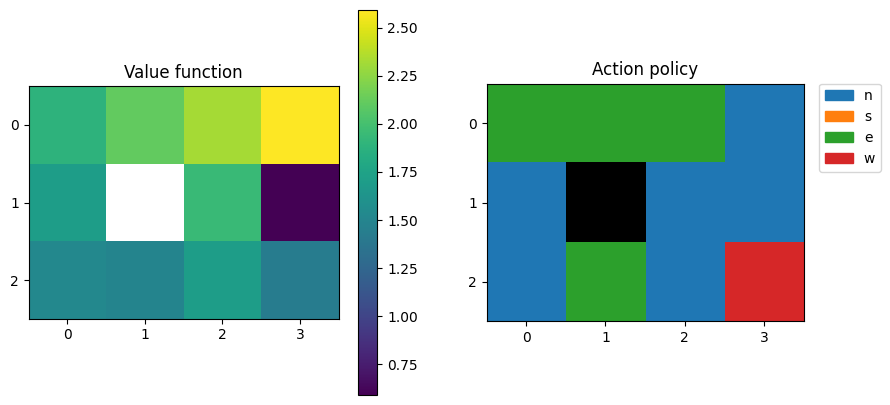

In [21]:
vf.plot()

In [43]:
model.immediate_reward_table[:,:,3,:]

array([[[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1.],


In [46]:
for s in [3]:
    for a in model.actions:
        sum = 0
        for s_p in model.states:
            inner_sum = 0
            for o in model.observations:
                inner_sum += (model.observation_table[s_p,a,o] * model.immediate_reward_table[s,a,s_p,o])
            sum += (model.transition_table[s,a,s_p] * inner_sum)
            print(f'a {a} - sp {s_p} - inner_sum: {inner_sum} - T {model.transition_table[s,a,s_p]}')
        # self.expected_rewards_table[s,a] = sum

a 0 - sp 0 - inner_sum: -0.04 - T 0.111111
a 0 - sp 1 - inner_sum: -0.04 - T 0.111111
a 0 - sp 2 - inner_sum: -0.04 - T 0.111111
a 0 - sp 3 - inner_sum: 1.0 - T 0.0
a 0 - sp 4 - inner_sum: -0.04 - T 0.111111
a 0 - sp 5 - inner_sum: -0.04 - T 0.111111
a 0 - sp 6 - inner_sum: -1.0 - T 0.0
a 0 - sp 7 - inner_sum: -0.04 - T 0.111112
a 0 - sp 8 - inner_sum: -0.04 - T 0.111111
a 0 - sp 9 - inner_sum: -0.04 - T 0.111111
a 0 - sp 10 - inner_sum: -0.04 - T 0.111111
a 1 - sp 0 - inner_sum: -0.04 - T 0.111111
a 1 - sp 1 - inner_sum: -0.04 - T 0.111111
a 1 - sp 2 - inner_sum: -0.04 - T 0.111111
a 1 - sp 3 - inner_sum: 1.0 - T 0.0
a 1 - sp 4 - inner_sum: -0.04 - T 0.111111
a 1 - sp 5 - inner_sum: -0.04 - T 0.111111
a 1 - sp 6 - inner_sum: -1.0 - T 0.0
a 1 - sp 7 - inner_sum: -0.04 - T 0.111112
a 1 - sp 8 - inner_sum: -0.04 - T 0.111111
a 1 - sp 9 - inner_sum: -0.04 - T 0.111111
a 1 - sp 10 - inner_sum: -0.04 - T 0.111111
a 2 - sp 0 - inner_sum: -0.04 - T 0.111111
a 2 - sp 1 - inner_sum: -0.04 - T 0

In [16]:
np.sum(rh)

120.32

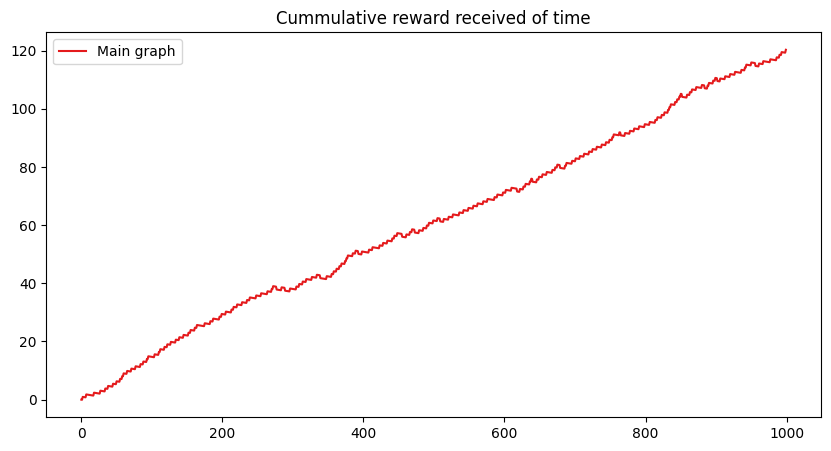

In [17]:
rh.plot('total')

In [18]:
beliefs = np.eye(model.state_count)

In [21]:
best_actions = []
for s in range(model.state_count):
    best_action = a.get_best_action(beliefs[s,:])
    best_actions.append(best_action)

In [22]:
best_actions

[2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 3]

In [23]:
model.action_labels

['n', 's', 'e', 'w']

In [24]:
for s in range(model.state_count):
    action_label = model.action_labels[best_actions[s]]
    print(f'State {s} - action {action_label}')

State 0 - action e
State 1 - action e
State 2 - action e
State 3 - action n
State 4 - action n
State 5 - action n
State 6 - action n
State 7 - action n
State 8 - action e
State 9 - action n
State 10 - action w
